# Homogeneous Transformation

## 3D plot practice

In [1]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from math import pi
from math import cos, sin
from math import sqrt

### Three-dimensional Points and Lines

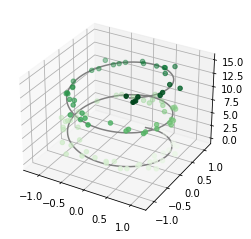

In [2]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for 3D scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

## Homogeneous Transformation Matrix

In [3]:
def homogeneous(rot_x, rot_y, rot_z, trans_x, trans_y, trans_z):
    # 
    R_x = np.array([[1, 0, 0, 0],
                    [0, cos(rot_x), -sin(rot_x), 0],
                    [0, sin(rot_x), cos(rot_x), 0],
                    [0, 0, 0, 1]])
    R_y = np.array([[cos(rot_y), 0, sin(rot_y), 0],
                    [0, 1, 0, 0],
                    [-sin(rot_y), 0, cos(rot_y), 0],
                    [0, 0, 0, 1]])
    R_z = np.array([[cos(rot_z), -sin(rot_z), 0, 0],
                    [sin(rot_z), cos(rot_z), 0, 0],
                    [0, 0, 1, 0],
                    [0, 0, 0, 1]])
    T = np.array([[1,0,0,trans_x],
                   [0,1,0,trans_y],
                   [0,0,1,trans_z],
                   [0,0,0,1]])
    
    T_t = R_x @ R_y @ R_z @ T
    return T_t
    

In [4]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# Test homogeneous matrix
def homo(rot_x, rot_y, rot_z, trans_x, trans_y, trans_z):
    v0_x = np.array([1, 0, 0, 1])
    v0_y = np.array([0, 1, 0, 1])
    v0_z = np.array([0, 0, 1, 1])
    v1_x = (homogeneous(rot_x, rot_y, rot_z, trans_x, trans_y, trans_z)@v0_x).T.flatten()
    v1_y = (homogeneous(rot_x, rot_y, rot_z, trans_x, trans_y, trans_z)@v0_y).T.flatten()
    v1_z = (homogeneous(rot_x, rot_y, rot_z, trans_x, trans_y, trans_z)@v0_z).T.flatten()

    p0 = np.array([0, 0, 0, 1]).reshape(-1,1).flatten()
    p1 = (homogeneous(rot_x, rot_y, rot_z, trans_x, trans_y, trans_z)@p0).T.flatten()
    
    print("rot_x:{}, rot_y:{}, rot_z:{}, \ntrans_x:{}, trans_y:{}, trans_z:{}".format(rot_x, rot_y, rot_z, trans_x, trans_y, trans_z))
    print("\n \n ")
    print("Original position (", p0[0], p0[1], p0[2], ")")
    print("Final position (", p1[0], p1[1], p1[2], ")")
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.set_xlim(-5, 5); ax.set_ylim(-5, 5); ax.set_zlim(0, 10);
    ax.scatter3D(p1[0], p1[1], p1[2])
    ax.plot3D([p1[0], v1_x[0]], [p1[1],v1_x[1]], [p1[2], v1_x[2]], 'r')
    ax.plot3D([p1[0], v1_y[0]], [p1[1],v1_y[1]], [p1[2], v1_y[2]], 'g')
    ax.plot3D([p1[0], v1_z[0]], [p1[1],v1_z[1]], [p1[2], v1_z[2]], 'b')

    
# Interactive function
interactive_plot = interactive(homo, rot_x=(-pi, pi), rot_y=(-pi, pi), rot_z=(-pi, pi), trans_x=(-2,2), trans_y=(-2,2), trans_z=(-2,2))
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='rot_x', max=3.141592653589793, min=-3.14159265358979…

## Pre-Multiplication or Post-Multiplication

The order of matrix multiplication matters!!

* **Pre-muliplication** : Rotates according to absolute coordinate

* **Post-muliplication** : Rotates according to current coordinate

In [5]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
plt.rcParams["figure.figsize"]=15,15

# Test homogeneous matrix
def pre_or_pose(rot_x_theta1, rot_y_theta2, rot_z_theta3):
    v0_x = np.array([1, 0, 0, 1])
    v0_y = np.array([0, 1, 0, 1])
    v0_z = np.array([0, 0, 1, 1])

    p0 = np.array([0, 0, 0, 1]).reshape(-1,1).flatten()
    v1 = np.array([1, 1, 1, 1])
    
    print("rot_x:{}, rot_y:{}, rot_z:{}".format(rot_x_theta1, rot_y_theta2, rot_z_theta3))
    print("\n \n ")

    v1_post = homogeneous(rot_x_theta1, 0,0,0,0,0) @ homogeneous(0, rot_y_theta2, 0,0,0,0) @ homogeneous(0,0,rot_z_theta3,0,0,0) @ v1
    v1_pre = homogeneous(0,0,rot_z_theta3,0,0,0) @ homogeneous(0, rot_y_theta2, 0,0,0,0) @ homogeneous(rot_x_theta1, 0,0,0,0,0) @ v1
    
    fig = plt.figure()

    ax = fig.add_subplot(1,2,1, projection='3d')
    ax.set_xlim(-5, 5); ax.set_ylim(-5, 5); ax.set_zlim(0, 10);
    ax.plot3D([p0[0], v0_x[0]*10], [p0[1],v0_x[1]*10], [p0[2], v0_x[2]*10], 'r')
    ax.plot3D([p0[0], v0_y[0]*10], [p0[1],v0_y[1]*10], [p0[2], v0_y[2]*10], 'g')
    ax.plot3D([p0[0], v0_z[0]*10], [p0[1],v0_z[1]*10], [p0[2], v0_z[2]*10], 'b')
    ax.plot3D([p0[0], v1_post[0]], [p0[1],v1_post[1]], [p0[2], v1_post[2]], 'y')
    ax.scatter3D(v1_post[0], v1_post[1], v1_post[2])
    ax.text(v1_post[0], v1_post[1], v1_post[2], 'post')
    
    ax = fig.add_subplot(1,2,2, projection='3d')
    ax.set_xlim(-5, 5); ax.set_ylim(-5, 5); ax.set_zlim(0, 10);
    ax.plot3D([p0[0], v0_x[0]*10], [p0[1],v0_x[1]*10], [p0[2], v0_x[2]*10], 'r')
    ax.plot3D([p0[0], v0_y[0]*10], [p0[1],v0_y[1]*10], [p0[2], v0_y[2]*10], 'g')
    ax.plot3D([p0[0], v0_z[0]*10], [p0[1],v0_z[1]*10], [p0[2], v0_z[2]*10], 'b')
    ax.plot3D([p0[0], v1_pre[0]], [p0[1],v1_pre[1]], [p0[2], v1_pre[2]], 'y')
    ax.scatter3D(v1_pre[0], v1_pre[1], v1_pre[2])
    ax.text(v1_pre[0], v1_pre[1], v1_pre[2], 'pre')
    
    print('v1_pre', v1_pre)
    print('v1_post', v1_post)
    print("See, the order matters!")
    

    
# Interactive function
interactive_plot = interactive(pre_or_pose, rot_x_theta1=(-2*pi, 2*pi, pi/10), rot_y_theta2=(-2*pi, 2*pi, pi/10), rot_z_theta3=(-2*pi, 2*pi, pi/10))
output = interactive_plot.children[-1]
output.layout.height = '600px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='rot_x_theta1', max=6.283185307179586, min=-6.2831853…

## Use Homogeneous Matrix define an 2-joint arm

[0 0 0 1]


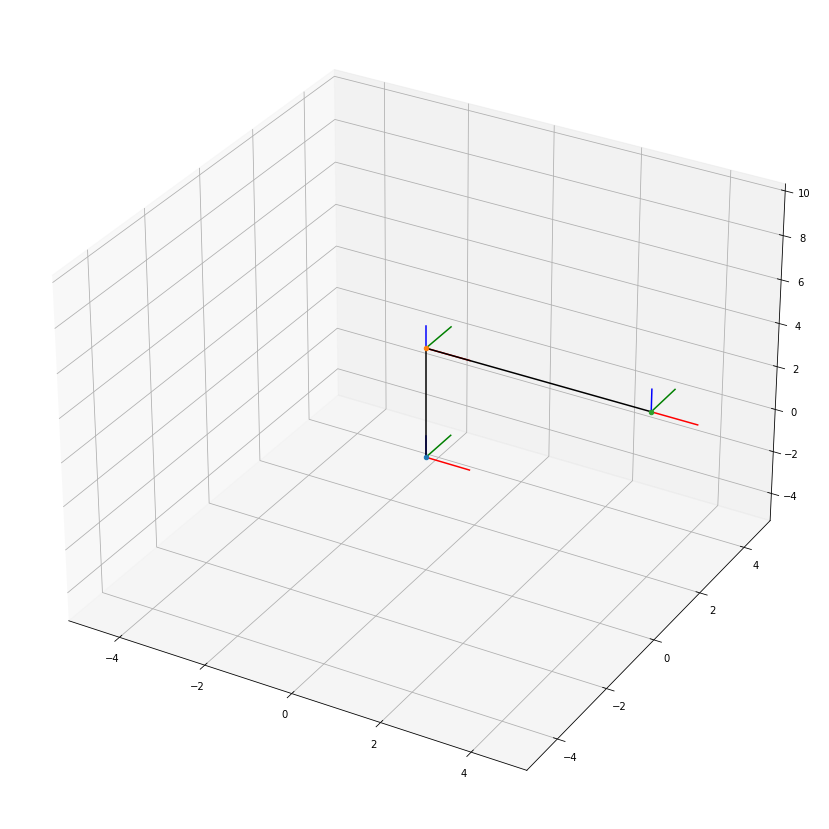

In [7]:
# print in 3D
fig = plt.figure()
ax = plt.axes(projection='3d')

p0 = np.array([0, 0, 0, 1]).reshape(-1,1).flatten()
p0_v = np.array([1,1,1,1]).flatten()
print(p0)

rot_x, rot_y, rot_z, trans_x, trans_y, trans_z = 0,0,0,0,0,5

# Here we use pre-multiplication, since it always references to absolute coordinate

p1 = homogeneous(rot_x, rot_y, rot_z, trans_x, trans_y, trans_z) @ p0
p1_v = homogeneous(rot_x, rot_y, rot_z, trans_x, trans_y, trans_z) @p0_v

rot_x, rot_y, rot_z, trans_x, trans_y, trans_z = 0,0,0,5,0,0

p2 = homogeneous(rot_x, rot_y, rot_z, trans_x, trans_y, trans_z) @ p1
p2_v = homogeneous(rot_x, rot_y, rot_z, trans_x, trans_y, trans_z) @ p1_v

ax.set_xlim(-5, 5); ax.set_ylim(-5, 5); ax.set_zlim(-5, 10);

ax.scatter3D(p0[0], p0[1], p0[2])
ax.plot3D([p0[0], p0_v[0]], [p0[1], p0[1]], [p0[2], p0[2]], 'r')
ax.plot3D([p0[0], p0[0]], [p0[1], p0_v[1]], [p0[2], p0[2]], 'g')
ax.plot3D([p0[0], p0[0]], [p0[1], p0[1]], [p0[2], p0_v[2]], 'b')

ax.plot3D([p0[0], p1[0]], [p0[1], p1[1]], [p0[2], p1[2]], 'k')

ax.scatter3D(p1[0], p1[1], p1[2])
ax.plot3D([p1[0], p1_v[0]], [p1[1], p1[1]], [p1[2], p1[2]], 'r')
ax.plot3D([p1[0], p1[0]], [p1[1], p1_v[1]], [p1[2], p1[2]], 'g')
ax.plot3D([p1[0], p1[0]], [p1[1], p1[1]], [p1[2], p1_v[2]], 'b')

ax.plot3D([p1[0], p2[0]], [p1[1], p2[1]], [p1[2], p2[2]], 'k')

ax.scatter3D(p2[0], p2[1], p2[2])
ax.plot3D([p2[0], p2_v[0]], [p2[1], p2[1]], [p2[2], p2[2]], 'r')
ax.plot3D([p2[0], p2[0]], [p2[1], p2_v[1]], [p2[2], p2[2]], 'g')
ax.plot3D([p2[0], p2[0]], [p2[1], p2[1]], [p2[2], p2_v[2]], 'b')

### We'll learn DH, which make the transformation easier.